# 项目名称： Tweet dog rates数据的清理与分析

## 数据收集

### 数据加载

In [1828]:
# 导入需要的库
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import json
import os

In [1829]:
# 收集文件 1 保存为 dataframe
df_arc = pd.read_csv('twitter-archive-enhanced.csv')

In [1830]:
# 收集文件 2 保存为 dataframe
# lines=True : Read the file as a json object per line.
df_api = pd.read_json('tweet_json.txt',lines=True)

In [1831]:
# 从URL收集文件 image-predictions.tsv
folder_name ='dog_scan'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
url ="https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv"
respose = requests.get(url)
with open(os.path.join(folder_name,url.split('/')[-1]),mode='wb') as file:
    file.write(respose.content)

In [1832]:
df_scan=pd.read_csv('image-predictions.tsv',sep='\t')

## 评估
### 目测评估

In [1833]:
# 目测评估三个数据集
df_arc.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1937,673919437611909120,NaN,NaN,2015-12-07 17:38:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Obie. He is on guard watching for evildoers from the comfort of his pumpkin. Very brave pupper. 11/10 https://t.co/cdwPTsGEAb,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673919437611909120/photo/1,11,10,Obie,None,None,pupper,None
244,846042936437604353,NaN,NaN,2017-03-26 16:55:29 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jarvis. The snow pupsets him. Officially ready for summer. 12/10 would perform a chilly boop https://t.co/0hLkztpiOW,NaN,NaN,NaN,https://twitter.com/dog_rates/status/846042936437604353/photo/1,12,10,Jarvis,None,None,None,None
1464,694356675654983680,6.706684e+17,4.196984e+09,2016-02-02 03:08:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This pupper only appears through the hole of a Funyun. Much like Phineas, this one is also mysterious af. 10/10 https://t.co/SQsEBW...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/694356675654983680/photo/1,10,10,None,None,None,pupper,None
83,876537666061221889,NaN,NaN,2017-06-18 20:30:39 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I can say with the pupmost confidence that the doggos who assisted with this search are heroic as h*ck. 14/10 for all https://t.co/...,NaN,NaN,NaN,https://twitter.com/mpstowerham/status/876162994446753793,14,10,None,None,None,None,None
1838,675898130735476737,NaN,NaN,2015-12-13 04:40:46 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I'm sure you've all seen this pupper. Not prepared at all for the flying disc of terror. 10/10 https://t.co/G0pQiFGM7O,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675898130735476737/photo/1,10,10,None,None,None,pupper,None


In [1834]:
df_scan.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1448,776113305656188928,https://pbs.twimg.com/media/CsVO7ljW8AAckRD.jpg,1,mousetrap,0.777468,False,black_widow,0.093940,False,paddlewheel,0.017492,False
1908,852672615818899456,https://pbs.twimg.com/media/C9VNNp1XkAEWRFb.jpg,1,golden_retriever,0.711235,True,otterhound,0.068235,True,Sussex_spaniel,0.046562,True
65,667174963120574464,https://pbs.twimg.com/media/CUJIFoJWsAAL3Dc.jpg,1,toy_poodle,0.266437,True,Chihuahua,0.243223,True,bluetick,0.072806,True
674,683391852557561860,https://pbs.twimg.com/media/CXvlQ2zW8AAE0tp.jpg,1,French_bulldog,0.992833,True,Boston_bull,0.004749,True,pug,0.001392,True
491,675534494439489536,https://pbs.twimg.com/media/CV_7CV6XIAEV05u.jpg,1,chow,0.749368,True,schipperke,0.133738,True,Newfoundland,0.049914,True


In [1835]:
df_api.sample(5)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
443,NaN,NaN,2017-01-11 02:57:27,"[0, 122]","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'dog_rates', 'name': 'SpookyWeRateDogs™', 'id': 4196983835, 'id_s...","{'media': [{'id': 819004789207928832, 'id_str': '819004789207928832', 'indices': [99, 122], 'media_url': 'http://pbs.twimg.com/medi...",0,False,RT @dog_rates: This is Bo. He was a very good First Doggo. 14/10 would be an absolute honor to pet https://t.co/AdPKrI8BZ1,NaN,...,0.0,NaN,NaN,NaN,42045,False,"{'created_at': 'Wed Jan 11 02:15:36 +0000 2017', 'id': 819004803107983360, 'id_str': '819004803107983360', 'full_text': 'This is Bo...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'SpookyWeRateDogs™', 'screen_name': 'dog_rates', 'location': 'MERCH↴ DM DOGS. W..."
278,NaN,NaN,2017-03-08 01:44:07,"[0, 111]","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'alexmartindawg', 'name': 'not feeling spooky🎃', 'id': 41198418, ...","{'media': [{'id': 839289900885282817, 'id_str': '839289900885282817', 'indices': [88, 111], 'media_url': 'http://pbs.twimg.com/medi...",0,False,RT @alexmartindawg: THE DRINK IS DR. PUPPER 10/10 good pun @matt___nelson @GoodDogsGame https://t.co/act3duiqbL,NaN,...,0.0,NaN,NaN,NaN,159,False,"{'created_at': 'Wed Mar 08 01:41:24 +0000 2017', 'id': 839289919298224128, 'id_str': '839289919298224128', 'full_text': 'THE DRINK ...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'SpookyWeRateDogs™', 'screen_name': 'dog_rates', 'location': 'MERCH↴ DM DOGS. W..."
969,NaN,NaN,2016-07-04 21:00:04,"[0, 60]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 750071693578735616, 'id_str': '750071693578735616...","{'media': [{'id': 750071693578735616, 'id_str': '750071693578735616', 'indices': [61, 84], 'media_url': 'http://pbs.twimg.com/media...",8618,False,Pause your cookout and admire this pupper's nifty hat. 10/10 https://t.co/RG4C9IdNJM,NaN,...,0.0,NaN,NaN,NaN,3782,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'SpookyWeRateDogs™', 'screen_name': 'dog_rates', 'location': 'MERCH↴ DM DOGS. W..."
1715,NaN,NaN,2015-12-24 23:00:17,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 680161093025697792, 'id_str': '680161093025697792...","{'media': [{'id': 680161093025697792, 'id_str': '680161093025697792', 'indices': [116, 139], 'media_url': 'http://pbs.twimg.com/med...",2527,False,Meet Goliath. He's an example of irony. Head is phenomenally round. Wants to be an ornament. 12/10 would hug gently https://t.co/72...,NaN,...,0.0,NaN,NaN,NaN,823,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'SpookyWeRateDogs™', 'screen_name': 'dog_rates', 'location': 'MERCH↴ DM DOGS. W..."
2024,NaN,NaN,2015-12-02 01:39:53,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 671866334851014656, 'id_str': '671866334851014656...","{'media': [{'id': 671866334851014656, 'id_str': '671866334851014656', 'indices': [116, 139], 'media_url': 'http://pbs.twimg.com/med...",1187,False,Meet Dylan. He can use a fork but clearly can't put on a sweatshirt correctly. Looks like a disgruntled teen. 10/10 https://t.co/FW...,NaN,...,0.0,NaN,NaN,NaN,545,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_st

### 定义函数

#### scan_value()函数

In [1836]:
# 应用value_counts()快捷查看每列数据情况
import types
def scan_value(df):
    i = 1
    for c in df.columns:
        print('----第{}个column : {}'.format(i,c)+'----')
        
       # 若column的数据类型为list，则先将其转换为tuple    
        if isinstance(df[c],list):
            print(df[c].apply(tuple).value_counts().nlargest(10))
        else:
            print(df[c].value_counts().nlargest(10))
        print('---------\n')
        i+=1
        
    print('--------value scanning complete!---------')

#### check_nan()函数

In [1837]:
# 查看每个column中存在的Nan数量
def check_nan(df):
    i=1
    for c in df.columns:
        print('----第{}个column : {}'.format(i,c)+'----')
        num = df[c].isnull().sum()
        print('含有{}个Nan'.format(num))
        print('\n')
        i+=1
    print('--------Nan checking complete!---------')      

<div>
<style>
    .dataframe thead tr:only-child th {
        text-align: right;
    }

### 编程评估

#### 评估df_arc

In [1838]:
df_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [1839]:
df_arc.shape

(2356, 17)

In [1840]:
scan_value(df_arc)

----第1个column : tweet_id----
749075273010798592    1
741099773336379392    1
798644042770751489    1
825120256414846976    1
769212283578875904    1
700462010979500032    1
780858289093574656    1
699775878809702401    1
880095782870896641    1
760521673607086080    1
Name: tweet_id, dtype: int64
---------

----第2个column : in_reply_to_status_id----
6.671522e+17    2
8.562860e+17    1
8.131273e+17    1
6.754971e+17    1
6.827884e+17    1
8.265984e+17    1
6.780211e+17    1
6.689207e+17    1
6.658147e+17    1
6.737159e+17    1
Name: in_reply_to_status_id, dtype: int64
---------

----第3个column : in_reply_to_user_id----
4.196984e+09    47
2.195506e+07     2
7.305050e+17     1
2.916630e+07     1
3.105441e+09     1
2.918590e+08     1
2.792810e+08     1
2.319108e+09     1
1.806710e+08     1
3.058208e+07     1
Name: in_reply_to_user_id, dtype: int64
---------

----第4个column : timestamp----
2015-12-05 02:37:35 +0000    1
2015-11-25 23:39:47 +0000    1
2017-06-14 16:04:48 +0000    1
2015-11-17 0

In [1841]:
check_nan(df_arc)

----第1个column : tweet_id----
含有0个Nan


----第2个column : in_reply_to_status_id----
含有2278个Nan


----第3个column : in_reply_to_user_id----
含有2278个Nan


----第4个column : timestamp----
含有0个Nan


----第5个column : source----
含有0个Nan


----第6个column : text----
含有0个Nan


----第7个column : retweeted_status_id----
含有2175个Nan


----第8个column : retweeted_status_user_id----
含有2175个Nan


----第9个column : retweeted_status_timestamp----
含有2175个Nan


----第10个column : expanded_urls----
含有59个Nan


----第11个column : rating_numerator----
含有0个Nan


----第12个column : rating_denominator----
含有0个Nan


----第13个column : name----
含有0个Nan


----第14个column : doggo----
含有0个Nan


----第15个column : floofer----
含有0个Nan


----第16个column : pupper----
含有0个Nan


----第17个column : puppo----
含有0个Nan


--------Nan checking complete!---------


In [1842]:
df_arc.tweet_id.duplicated().sum()

0

#### 评估df_scan

In [1843]:
df_scan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [1844]:
df_scan.shape

(2075, 12)

In [1845]:
scan_value(df_scan)

----第1个column : tweet_id----
685532292383666176    1
826598365270007810    1
692158366030913536    1
714606013974974464    1
715696743237730304    1
776477788987613185    1
772114945936949249    1
699775878809702401    1
780858289093574656    1
700462010979500032    1
Name: tweet_id, dtype: int64
---------

----第2个column : jpg_url----
https://pbs.twimg.com/media/CvT6IV6WEAQhhV5.jpg                2
https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg                2
https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg                2
https://pbs.twimg.com/media/CxqsX-8XUAAEvjD.jpg                2
https://pbs.twimg.com/media/CmoPdmHW8AAi8BI.jpg                2
https://pbs.twimg.com/media/CsGnz64WYAEIDHJ.jpg                2
https://pbs.twimg.com/tweet_video_thumb/CeBym7oXEAEWbEg.jpg    2
https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg                2
https://pbs.twimg.com/media/CsrjryzWgAAZY00.jpg                2
https://pbs.twimg.com/media/Cs_DYr1XEAA54Pu.jpg                2
Name: jpg_url

In [1846]:
check_nan(df_scan)

----第1个column : tweet_id----
含有0个Nan


----第2个column : jpg_url----
含有0个Nan


----第3个column : img_num----
含有0个Nan


----第4个column : p1----
含有0个Nan


----第5个column : p1_conf----
含有0个Nan


----第6个column : p1_dog----
含有0个Nan


----第7个column : p2----
含有0个Nan


----第8个column : p2_conf----
含有0个Nan


----第9个column : p2_dog----
含有0个Nan


----第10个column : p3----
含有0个Nan


----第11个column : p3_conf----
含有0个Nan


----第12个column : p3_dog----
含有0个Nan


--------Nan checking complete!---------


In [1847]:
df_scan.tweet_id.duplicated().sum()

0

#### 评估df_api

In [1848]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2352 non-null datetime64[ns]
display_text_range               2352 non-null object
entities                         2352 non-null object
extended_entities                2073 non-null object
favorite_count                   2352 non-null int64
favorited                        2352 non-null bool
full_text                        2352 non-null object
geo                              0 non-null float64
id                               2352 non-null int64
id_str                           2352 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

In [1849]:
df_api.shape

(2352, 31)

In [1850]:
scan_value(df_api)

----第1个column : contributors----
Series([], Name: contributors, dtype: int64)
---------

----第2个column : coordinates----
Series([], Name: coordinates, dtype: int64)
---------

----第3个column : created_at----
2016-09-12 15:10:21    1
2016-06-03 01:07:16    1
2017-01-31 01:27:39    1
2016-10-13 23:23:56    1
2016-06-27 01:37:04    1
2016-07-26 00:08:05    1
2016-01-05 02:30:55    1
2016-12-14 17:16:53    1
2015-11-27 22:01:40    1
2017-03-26 01:38:00    1
Name: created_at, dtype: int64
---------

----第4个column : display_text_range----
[0, 140]    258
[0, 139]    147
[0, 138]     80
[0, 137]     78
[0, 116]     59
[0, 115]     51
[0, 136]     50
[0, 134]     44
[0, 135]     41
[0, 112]     38
Name: display_text_range, dtype: int64
---------

----第5个column : entities----
{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'dog_rates', 'name': 'SpookyWeRateDogs™', 'id': 4196983835, 'id_str': '4196983835', 'indices': [3, 13]}], 'urls': []}                                        

{'id': 4196983835, 'id_str': '4196983835', 'name': 'SpookyWeRateDogs™', 'screen_name': 'dog_rates', 'location': 'MERCH↴  DM DOGS. WE WILL RATE', 'description': 'Only Legit Source for Professional Dog Ratings STORE: @ShopWeRateDogs | IG, FB & SC: WeRateDogs | MOBILE APP: @GoodDogsGame Business: dogratingtwitter@gmail.com', 'url': 'https://t.co/N7sNNHAEXS', 'entities': {'url': {'urls': [{'url': 'https://t.co/N7sNNHAEXS', 'expanded_url': 'http://weratedogs.com', 'display_url': 'weratedogs.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 3769025, 'friends_count': 107, 'listed_count': 3353, 'created_at': 'Sun Nov 15 21:41:29 +0000 2015', 'favourites_count': 120161, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 5749, 'lang': 'en', 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': '000000', 'profile_background_image_url': 'http://

In [1851]:
check_nan(df_api)

----第1个column : contributors----
含有2352个Nan


----第2个column : coordinates----
含有2352个Nan


----第3个column : created_at----
含有0个Nan


----第4个column : display_text_range----
含有0个Nan


----第5个column : entities----
含有0个Nan


----第6个column : extended_entities----
含有279个Nan


----第7个column : favorite_count----
含有0个Nan


----第8个column : favorited----
含有0个Nan


----第9个column : full_text----
含有0个Nan


----第10个column : geo----
含有2352个Nan


----第11个column : id----
含有0个Nan


----第12个column : id_str----
含有0个Nan


----第13个column : in_reply_to_screen_name----
含有2274个Nan


----第14个column : in_reply_to_status_id----
含有2274个Nan


----第15个column : in_reply_to_status_id_str----
含有2274个Nan


----第16个column : in_reply_to_user_id----
含有2274个Nan


----第17个column : in_reply_to_user_id_str----
含有2274个Nan


----第18个column : is_quote_status----
含有0个Nan


----第19个column : lang----
含有0个Nan


----第20个column : place----
含有2351个Nan


----第21个column : possibly_sensitive----
含有141个Nan


----第22个column : possibly_sensitiv

In [1852]:
df_api

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696...","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/medi...",39492,False,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,...,0.0,NaN,NaN,NaN,8842,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'SpookyWeRateDogs™', 'screen_name': 'dog_rates', 'location': 'MERCH↴ DM DOGS. W..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892177413194625024, 'id_str': '892177413194625024...","{'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/med...",33786,False,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit...",NaN,...,0.0,NaN,NaN,NaN,6480,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'SpookyWeRateDogs™', 'screen_name': 'dog_rates', 'location': 'MERCH↴ DM DOGS. W..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 891815175371796480, 'id_str': '891815175371796480...","{'media': [{'id': 891815175371796480, 'id_str': '891815175371796480', 'indices': [122, 145], 'media_url': 'http://pbs.twimg.com/med...",25445,False,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t...,NaN,...,0.0,NaN,NaN,NaN,4301,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'SpookyWeRateDogs™', 'screen_name': 'dog_rates', 'location': 'MERCH↴ DM DOGS. W..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 891689552724799489, 'id_str': '891689552724799489...","{'media': [{'id': 891689552724799489, 'id_str': '891689552724799489', 'indices': [80, 103], 'media_url': 'http://pbs.twimg.com/medi...",42863,False,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,...,0.0,NaN,NaN,NaN,8925,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'SpookyWeRateDogs™', 'screen_name': 'dog_rates', 'location': 'MERCH↴ DM DOGS. W..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': [129, 138]}], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 891327...","{'media': [{'id': 891327551943041024, 'id_str': '891327551943041024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/med...",41016,False,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #B...",NaN,...,0.0,NaN,NaN,NaN,9721,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'SpookyWeRateDogs™', 'screen_name': 'dog_rates', 'location': 'MERCH↴ DM DOGS. W..."
5,NaN,NaN,2017-07-29 00:08:17,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': [129, 138]}], 'symbols': [], 'use

### 问题总结

#### 质量问题
##### `df_arc` 表格

- rating_denominator、rating_numerator两列中，关于狗狗评分的数据存在不准确的情况
- timestamp为object格式，应转为时间格式
- 狗狗种类一列存在数据缺失，需补充
- 部分狗狗name为None，且有部分name明显错误

##### `df_scan` 表格
- 种类、名字、品种列为object类型，改为category类型
- 狗狗品种名称大小写都有


##### `df_api` 表格
- 狗狗分类和名字的列中存在NaN
- display_text_range 为列表格式



#### 整洁度问题
-  `df_arc` 表格中，狗狗品种分为多个columns，应将其合并到1个column中
- `df_arc` 表格中，in_reply_to_status_id、in_reply_to_user_id、retweeted_status_id、retweeted_status_user_id、retweeted_status_timestamp这5个列的values基本为NaN，对数据分析无意义，应当删除
- 三个表格应提取有分析意义的columns，合并为一个主表格



## 数据清理

In [1853]:
# 备份三个数据集
df_arc_c = df_arc.copy()
df_scan_c = df_scan.copy()
df_api_c = df_api.copy()

### 清洁度处理

>#### 删除retweet的行，删除多余的列

##### 定义
in_reply_to_status_id、in_reply_to_user_id、retweeted_status_user_id、retweeted_status_id、retweeted_status_timestamp这5个列的values基本为NaN，对数据分析无意义，应当删除。

##### 代码

In [1854]:
df_arc_c.retweeted_status_id.notnull().sum()

181

In [1855]:
# 删除retweet非Nan的行
df_arc_c = df_arc_c[df_arc_c.retweeted_status_id.isnull()]

In [1856]:
#核实是否还存在非Nan行
df_arc_c.retweeted_status_id.notnull().sum()

0

In [1857]:
# 删除多余列
df_arc_c.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','source','expanded_urls'],axis=1,inplace=True)

##### 测试

In [1858]:
df_arc_c.shape

(2175, 10)

In [1859]:
df_arc_c.sample(3)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
638,793271401113350145,2016-11-01 02:00:14 +0000,Meet Dave. It's his favorite day of the year. He gets to fulfill his dream of being a dinosaur. 12/10 inspirational af https://t.co...,12,10,Dave,None,None,None,None
63,879862464715927552,2017-06-28 00:42:13 +0000,This is Romeo. He would like to do an entrance. Requesting your immediate assistance. 13/10 https://t.co/Qh5aEkRQm9,13,10,Romeo,None,None,None,None
1933,674019345211760640,2015-12-08 00:15:09 +0000,This is Acro. You briefly see her out of the corner of your eye. You look and she's not there. 10/10 mysterious pup https://t.co/fq...,10,10,Acro,None,None,None,None


>#### 狗狗类型合并为1列

##### 定义
狗狗品种分为多个columns，应将其合并到1个column中

##### 代码

In [1860]:
df_arc_c.tweet_id.duplicated().sum()

0

In [1861]:
df_arc_c.shape

(2175, 10)

In [1862]:
df_arc_c = pd.melt(df_arc_c,id_vars=['tweet_id','timestamp', 'text','rating_numerator','rating_denominator','name'],
        var_name='category',value_name='actual_catg')

In [1863]:
df_arc_c.tweet_id.duplicated().sum()

6525

In [1864]:
df_arc_c.actual_catg.value_counts()

None       8344
pupper      234
doggo        87
puppo        25
floofer      10
Name: actual_catg, dtype: int64

In [1865]:
#将df_arc_c分别按照'tweet_id','actual_catg'倒序排列，actual_catg的值不为None的在最上方
df_arc_c.sort_values(by=['tweet_id','actual_catg'],ascending=False,inplace=True)

In [1866]:
#将重复的tweet_id行去除
df_arc_c.drop_duplicates(subset='tweet_id',inplace=True)

In [1867]:
#将多余的‘category’列去除
df_arc_c.drop('category',axis=1,inplace=True)

##### 测试

In [1868]:
df_arc_c.shape

(2175, 7)

In [1869]:
df_arc_c.actual_catg.value_counts()

None       1831
pupper      234
doggo        75
puppo        25
floofer      10
Name: actual_catg, dtype: int64

>#### 将3个数据集进行选择性合并

##### 1，合并df_api 和 df_arc为df

##### 定义
将df_api中的retweet_count和favorite_count两列提取，合并入df_arc

##### 代码

In [1870]:
#将df_arc中的列名tweet_id改为id
df_arc_c.rename(columns={'tweet_id':'id'},inplace=True)

In [1871]:
df_arc_c.sample()

,id,timestamp,text,rating_numerator,rating_denominator,name,actual_catg
1608,677565715327688705,2015-12-17 19:07:09 +0000,Contortionist pup here. Inside pentagram. Clearly worships Satan. Known to slowly push fragile stuff off tables 6/10 https://t.co/E...,6,10,None,None


In [1872]:
df_api_c_sim = df_api_c[['id','display_text_range','retweet_count','favorite_count']]

In [1873]:
df = pd.merge(df_arc_c,df_api_c_sim,on='id',how='left')

##### 测试

In [1874]:
df.sample()

,id,timestamp,text,rating_numerator,rating_denominator,name,actual_catg,display_text_range,retweet_count,favorite_count
2158,666102155909144576,2015-11-16 03:55:04 +0000,Oh my. Here you are seeing an Adobe Setter giving birth to twins!!! The world is an amazing place. 11/10 https://t.co/11LvqN4WLq,11,10,None,None,"[0, 128]",15,81


In [1875]:
df.shape

(2175, 10)

##### 2，将df_scan_c 合并入 df

##### 定义
选取df_scan_c数据集中的 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',  'p2_conf', 'p2_dog'列，合并到df中

##### 代码

In [1876]:
#修改df_scan_c中的tweet_id列名为id
df_scan_c.rename(columns={'tweet_id':'id'},inplace=True)

In [1877]:
df_scan_c.sample()

,id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
27,666396247373291520,https://pbs.twimg.com/media/CT-D2ZHWIAA3gK1.jpg,1,Chihuahua,0.978108,True,toy_terrier,0.009397,True,papillon,0.004577,True


In [1878]:
# 核实是否有图片缺失的情况
df_scan_c.jpg_url.isnull().sum()

0

In [1879]:
df_scan_c_sim = df_scan_c[['id', 'img_num', 'p1', 'p1_conf']]

In [1880]:
#  使用inner合并，将df中没有图片的行去除
df = pd.merge(df,df_scan_c_sim,on='id',how='inner')

##### 测试

In [1881]:
df.shape

(1994, 13)

In [1882]:
df.sample(3)

,id,timestamp,text,rating_numerator,rating_denominator,name,actual_catg,display_text_range,retweet_count,favorite_count,img_num,p1,p1_conf
786,742465774154047488,2016-06-13 21:16:49 +0000,"Was just informed about this hero pupper and others like her. Another 14/10, would be an absolute honor to pet https://t.co/hBTzPmj36Z",14,10,None,pupper,"[0, 110]",4363,7886,1,web_site,0.997154
1262,686749460672679938,2016-01-12 03:20:05 +0000,Strange pup here. Easily manipulated. Rather inbred. Sharp for a dog. Appears uncomfortable. 8/10 would still pet https://t.co/nSQr...,8,10,None,None,"[0, 137]",1657,3798,1,cheeseburger,0.643808
26,886736880519319552,2017-07-16 23:58:41 +0000,"This is Mingus. He's a wonderful father to his smol pup. Confirmed 13/10, but he needs your help\n\nhttps://t.co/bVi0Yr4Cff https:/...",13,10,Mingus,None,"[0, 121]",3420,12286,1,kuvasz,0.309706


### 质量处理

>##### 1， rating_denominator、rating_numerator两列中，关于狗狗评分的数据存在不准确的情况

##### 定义
从text一列中，应用正则表达式重新获取准确的数据

##### 代码

In [1883]:
#显示rating_denominator中不为10的数值
not_10 = df.rating_denominator.value_counts().index[1:]
not_10_list = list(not_10)
not_10_list

[50, 80, 11, 170, 150, 130, 120, 110, 90, 70, 40, 20, 7, 2]

In [1884]:
#设置value的显示长度为135，默认为50
pd.set_option('max_colwidth',135)

In [1885]:
#查看异常数据
df[df.rating_denominator != 10]

,id,timestamp,text,rating_numerator,rating_denominator,name,actual_catg,display_text_range,retweet_count,favorite_count,img_num,p1,p1_conf
323,820690176645140481,2017-01-15 17:52:40 +0000,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70,None,None,"[0, 75]",3699,13476,2,West_Highland_white_terrier,0.872064
385,810984652412424192,2016-12-19 23:06:23 +0000,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t...,24,7,Sam,None,"[0, 143]",1647,5904,1,golden_retriever,0.871342
662,758467244762497024,2016-07-28 01:00:57 +0000,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150,None,None,"[0, 54]",2516,5297,1,Labrador_retriever,0.436377
800,740373189193256964,2016-06-08 02:41:38 +0000,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/X...",9,11,None,None,"[0, 116]",15029,37704,3,golden_retriever,0.807644
848,731156023742988288,2016-05-13 16:15:54 +0000,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170,this,None,"[0, 97]",1427,4172,1,lakeside,0.501767
891,722974582966214656,2016-04-21 02:25:47 +0000,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20,None,None,"[0, 40]",1754,4473,1,Great_Dane,0.246762
925,716439118184652801,2016-04-03 01:36:11 +0000,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50,Bluebert,None,"[0, 117]",246,2562,1,Siberian_husky,0.396495
946,713900603437621249,2016-03-27 01:29:02 +0000,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90,None,None,"[0, 93]",827,3049,1,golden_retriever,0.371816
970,710658690886586372,2016-03-18 02:46:49 +0000,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80,None,None,"[0, 108]",633,2513,1,soft-coated_wheaten_terrier,0.948617
988,709198395643068416,2016-03-14 02:04:08 +0000,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://...",45,50,None,None,"[0, 144]",716,2623,1,borzoi,0.490783


##### 从text中提取rate，主要分为三类情况：
- rating_denominator 为 10
- rating_denominator 为 10的倍数
- text中无rate，或者rate格式错误，如出现24/7

注：前2类也可归于一类，即可以被10整除，或者抽象为末位数为0

In [1886]:
df['rate_both'] = df.text.str.extract('([0-9]+[.]?[0-9]*/[0-9]+0)',expand=True)

In [1887]:
df.isnull().sum()

id                    0
timestamp             0
text                  0
rating_numerator      0
rating_denominator    0
name                  0
actual_catg           0
display_text_range    0
retweet_count         0
favorite_count        0
img_num               0
p1                    0
p1_conf               0
rate_both             1
dtype: int64

In [1888]:
df['rate_both'].value_counts()

12/10       450
10/10       420
11/10       396
13/10       261
9/10        151
8/10         95
7/10         51
14/10        36
5/10         32
6/10         32
3/10         19
4/10         15
2/10          9
1/10          4
0/10          2
88/80         1
9.75/10       1
45/50         1
84/70         1
204/170       1
44/40         1
121/110       1
165/150       1
4/20          1
1776/10       1
11.26/10      1
420/10        1
144/120       1
13.5/10       1
50/50         1
143/130       1
99/90         1
11.27/10      1
80/80         1
60/50         1
Name: rate_both, dtype: int64

In [1889]:
df.sample()

,id,timestamp,text,rating_numerator,rating_denominator,name,actual_catg,display_text_range,retweet_count,favorite_count,img_num,p1,p1_conf,rate_both
1040,705239209544720384,2016-03-03 03:51:44 +0000,This is Jimothy. He lost his body during the the Third Crusade (tragic). 11/10 heroic af tho https://t.co/wnsblfu7XE,11,10,Jimothy,None,"[0, 116]",848,3271,1,Chihuahua,0.15795,11/10


In [1890]:
df['rate'],df['rate_deno'] = df['rate_both'].str.split('/').str

In [1891]:
df.sample()

,id,timestamp,text,rating_numerator,rating_denominator,name,actual_catg,display_text_range,retweet_count,favorite_count,img_num,p1,p1_conf,rate_both,rate,rate_deno
1052,704347321748819968,2016-02-29 16:47:42 +0000,This is Ralphson. He's very confused. Wondering why he's sitting on Santa's lap in February. 10/10 stay woke pupper https://t.co/IN...,10,10,Ralphson,pupper,"[0, 139]",390,1722,1,teddy,0.233378,10/10,10,10


In [1892]:
df[df.rate_deno != '10']

,id,timestamp,text,rating_numerator,rating_denominator,name,actual_catg,display_text_range,retweet_count,favorite_count,img_num,p1,p1_conf,rate_both,rate,rate_deno
323,820690176645140481,2017-01-15 17:52:40 +0000,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70,None,None,"[0, 75]",3699,13476,2,West_Highland_white_terrier,0.872064,84/70,84,70
385,810984652412424192,2016-12-19 23:06:23 +0000,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t...,24,7,Sam,None,"[0, 143]",1647,5904,1,golden_retriever,0.871342,NaN,NaN,NaN
662,758467244762497024,2016-07-28 01:00:57 +0000,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150,None,None,"[0, 54]",2516,5297,1,Labrador_retriever,0.436377,165/150,165,150
848,731156023742988288,2016-05-13 16:15:54 +0000,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170,this,None,"[0, 97]",1427,4172,1,lakeside,0.501767,204/170,204,170
891,722974582966214656,2016-04-21 02:25:47 +0000,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20,None,None,"[0, 40]",1754,4473,1,Great_Dane,0.246762,4/20,4,20
925,716439118184652801,2016-04-03 01:36:11 +0000,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50,Bluebert,None,"[0, 117]",246,2562,1,Siberian_husky,0.396495,50/50,50,50
946,713900603437621249,2016-03-27 01:29:02 +0000,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90,None,None,"[0, 93]",827,3049,1,golden_retriever,0.371816,99/90,99,90
970,710658690886586372,2016-03-18 02:46:49 +0000,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80,None,None,"[0, 108]",633,2513,1,soft-coated_wheaten_terrier,0.948617,80/80,80,80
988,709198395643068416,2016-03-14 02:04:08 +0000,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://...",45,50,None,None,"[0, 144]",716,2623,1,borzoi,0.490783,45/50,45,50
1054,704054845121142784,2016-02-28 21:25:30 +0000,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60,50,a,None,"[0, 82]",1023,3193,1,Great_Pyrenees,0.667939,60/50,60,50


In [1893]:
#核实上方rate出现Nan值的行，为df中唯一一个存在Nan的行
df.isnull().sum()

id                    0
timestamp             0
text                  0
rating_numerator      0
rating_denominator    0
name                  0
actual_catg           0
display_text_range    0
retweet_count         0
favorite_count        0
img_num               0
p1                    0
p1_conf               0
rate_both             1
rate                  1
rate_deno             1
dtype: int64

In [1894]:
#删除存在Nan的这一行
df.dropna(axis=0,inplace=True)

In [1895]:
# 核实已删除
df[df.rate_deno != '10']

,id,timestamp,text,rating_numerator,rating_denominator,name,actual_catg,display_text_range,retweet_count,favorite_count,img_num,p1,p1_conf,rate_both,rate,rate_deno
323,820690176645140481,2017-01-15 17:52:40 +0000,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70,None,None,"[0, 75]",3699,13476,2,West_Highland_white_terrier,0.872064,84/70,84,70
662,758467244762497024,2016-07-28 01:00:57 +0000,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150,None,None,"[0, 54]",2516,5297,1,Labrador_retriever,0.436377,165/150,165,150
848,731156023742988288,2016-05-13 16:15:54 +0000,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170,this,None,"[0, 97]",1427,4172,1,lakeside,0.501767,204/170,204,170
891,722974582966214656,2016-04-21 02:25:47 +0000,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20,None,None,"[0, 40]",1754,4473,1,Great_Dane,0.246762,4/20,4,20
925,716439118184652801,2016-04-03 01:36:11 +0000,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50,Bluebert,None,"[0, 117]",246,2562,1,Siberian_husky,0.396495,50/50,50,50
946,713900603437621249,2016-03-27 01:29:02 +0000,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90,None,None,"[0, 93]",827,3049,1,golden_retriever,0.371816,99/90,99,90
970,710658690886586372,2016-03-18 02:46:49 +0000,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80,None,None,"[0, 108]",633,2513,1,soft-coated_wheaten_terrier,0.948617,80/80,80,80
988,709198395643068416,2016-03-14 02:04:08 +0000,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://...",45,50,None,None,"[0, 144]",716,2623,1,borzoi,0.490783,45/50,45,50
1054,704054845121142784,2016-02-28 21:25:30 +0000,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60,50,a,None,"[0, 82]",1023,3193,1,Great_Pyrenees,0.667939,60/50,60,50
1130,697463031882764288,2016-02-10 16:51:59 +0000,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44,40,None,None,"[0, 92]",1547,3730,1,Labrador_retriever,0.999885,44/40,44,40


In [1896]:
df.rate = df.rate.astype(float)
df.rate_deno = df.rate_deno.astype(int)

In [1897]:
df.shape

(1993, 16)

In [1898]:
df.rate = df.rate/(df.rate_deno/10)

In [1899]:
df.rate.value_counts()

/Users/cuichuanmin/anaconda3/lib/python3.7/site-packages/IPython/core/displayhook.py:271: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


12.00      454
10.00      422
11.00      402
13.00      261
9.00       152
8.00        95
7.00        51
14.00       36
5.00        32
6.00        32
3.00        19
4.00        15
2.00        10
1.00         4
0.00         2
1776.00      1
9.75         1
13.50        1
11.26        1
11.27        1
420.00       1
Name: rate, dtype: int64

In [1900]:
# 删除无法获取准确rate的两行
df.query('rate == 1776')
df.drop([726],axis=0,inplace=True)

In [1901]:
df.query('rate == 420')
df.drop([1718],axis=0,inplace=True)

In [1902]:
#核实已删除
df.rate.value_counts()

12.00    454
10.00    422
11.00    402
13.00    261
9.00     152
8.00      95
7.00      51
14.00     36
6.00      32
5.00      32
3.00      19
4.00      15
2.00      10
1.00       4
0.00       2
9.75       1
11.26      1
13.50      1
11.27      1
Name: rate, dtype: int64

In [1903]:
# 将rate_deno统一改为10
df.rate_deno = 10

In [1904]:
#删除多余的列
df.drop(['rating_numerator','rating_denominator','rate_both'],axis=1,inplace=True)

##### 测试

In [1905]:
df.rate_deno.value_counts()

10    1991
Name: rate_deno, dtype: int64

In [1906]:
df.isnull().sum()

id                    0
timestamp             0
text                  0
name                  0
actual_catg           0
display_text_range    0
retweet_count         0
favorite_count        0
img_num               0
p1                    0
p1_conf               0
rate                  0
rate_deno             0
dtype: int64

In [1907]:
df.shape

(1991, 13)

In [1908]:
df.sample()

,id,timestamp,text,name,actual_catg,display_text_range,retweet_count,favorite_count,img_num,p1,p1_conf,rate,rate_deno
81,872967104147763200,2017-06-09 00:02:31 +0000,Here's a very large dog. He has a date later. Politely asked this water person to check if his breath is bad. 12/10 good to go dogg...,None,doggo,"[0, 132]",5632,27918,2,Labrador_retriever,0.476913,12.0,10


>##### 2，timestamp为object格式，应转为时间格式

##### 定义
通过datetime更改为时间格式

##### 代码

In [1909]:
df['timestamp'] = pd.to_datetime(df["timestamp"])

##### 测试

In [1910]:
df.timestamp.dtype

dtype('<M8[ns]')

>##### 3，狗狗种类一列存在数据缺失，需补充

##### 定义
从text中提取狗狗种类

##### 代码

In [1911]:
df.actual_catg.value_counts()

None       1685
pupper      212
doggo        63
puppo        23
floofer       8
Name: actual_catg, dtype: int64

In [1912]:
# 从text中提取pupper|doggo|puppo|floofer中的一个，并将其返回值覆盖原actual_catg列
df.actual_catg = df.text.str.lower().str.extract('(pupper|doggo|puppo|floofer)',expand=True)

##### 测试

In [1913]:
df.actual_catg.value_counts()

pupper     231
doggo       75
puppo       29
floofer      7
Name: actual_catg, dtype: int64

In [1914]:
df.isnull().sum()

id                       0
timestamp                0
text                     0
name                     0
actual_catg           1649
display_text_range       0
retweet_count            0
favorite_count           0
img_num                  0
p1                       0
p1_conf                  0
rate                     0
rate_deno                0
dtype: int64

>##### 4，部分狗狗name为None

##### 定义
从text列的评论中获取尽量多的狗狗name，填补缺失值和错误值

##### 代码
根据观察，name出现的形式主要有以下几种：

a, This is name.

b, Meet name.

c, Say hello to name.

In [1915]:
df.name.value_counts()

None        545
a            55
Charlie      11
Cooper       10
Lucy         10
Oliver       10
Tucker        9
Penny         9
Sadie         8
Winston       8
Toby          7
Lola          7
Daisy         7
the           7
Jax           6
Koda          6
Stanley       6
Bella         6
Bo            6
an            6
Rusty         5
Dave          5
Buddy         5
Louis         5
Scout         5
Oscar         5
Bailey        5
Chester       5
Milo          5
Leo           5
           ... 
Jonah         1
Tonks         1
BeBe          1
Fiji          1
Jockson       1
Bell          1
Ashleigh      1
Tino          1
Pippin        1
Brooks        1
Mairi         1
Emanuel       1
Grizz         1
Simba         1
Dixie         1
my            1
Hall          1
Ambrose       1
Herb          1
Poppy         1
Clarq         1
Herschel      1
Ulysses       1
Halo          1
Aldrick       1
Jiminus       1
Hanz          1
Robin         1
Fabio         1
Tessa         1
Name: name, Length: 936,

In [1916]:
#匹配text中This is name.形式的字段，并从中提取name，形成name_1列
df['name_1'] = df.text.str.extract('((This is )[a-zA-Z]+\.)',expand=True)[0].str[:-1].str.split().str[-1]

#匹配text中Meet name.形式的字段，并从中提取name，形成name_2列
df['name_2'] = df.text.str.extract('((Meet )[a-zA-Z]+\.)',expand=True)[0].str[:-1].str.split().str[-1]

#匹配text中Say hello to name.形式的字段，并从中提取name，形成name_3列
df['name_3'] =  df.text.str.extract('((Say hello to )[a-zA-Z]+\.)',expand=True)[0].str[:-1].str.split().str[-1]

In [1917]:
#单独取出以上新产生的3个列
df1 = df[['name_1','name_2','name_3']]

In [1918]:
df1.name_1.isnull().sum()

1000

In [1919]:
#df1中的nan值，由其后列中的值填充
df1.fillna(method='backfill',axis=1,inplace=True)

/Users/cuichuanmin/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [1920]:
df1.name_1.isnull().sum()

736

In [1921]:
df.name_1 =df1.name_1

In [1922]:
#将df中多余的列删除
df.drop(['name','name_2','name_3'],axis=1,inplace=True)

##### 测试

In [1923]:
df.name_1.isnull().sum()

736

In [1924]:
df.sample()

,id,timestamp,text,actual_catg,display_text_range,retweet_count,favorite_count,img_num,p1,p1_conf,rate,rate_deno,name_1
1680,671735591348891648,2015-12-01 17:00:19,This is Oscar. He's ready for Christmas. 11/10 https://t.co/TON0Irzgwr,NaN,"[0, 70]",815,1527,2,stone_wall,0.271121,11.0,10,Oscar


In [1925]:
df.name_1.value_counts()

Charlie     11
Cooper      10
Tucker       9
Oliver       9
Lucy         9
Penny        8
Winston      8
Toby         7
Daisy        7
Lola         7
Sadie        6
Koda         6
Stanley      6
Bella        6
Bo           5
Jax          5
Louis        5
Buddy        5
Bailey       5
Rusty        5
Scout        5
Leo          5
Winnie       4
Phil         4
Derek        4
Gus          4
Alfie        4
Sophie       4
Clark        4
Bear         4
            ..
Snoop        1
Obie         1
Willy        1
Cal          1
Atticus      1
Rover        1
Todo         1
Robin        1
Hanz         1
Jiminus      1
Mairi        1
Duddles      1
Ronduh       1
Kona         1
Sandra       1
Iroh         1
Clarq        1
Happy        1
Brooks       1
Emanuel      1
Aldrick      1
Grizz        1
Simba        1
Dixie        1
Bobbay       1
Pippin       1
Herschel     1
Ulysses      1
Halo         1
Anthony      1
Name: name_1, Length: 856, dtype: int64

>##### 5，狗狗品种名称，大小写都有

##### 定义
将狗狗品种名称，统一为小写

##### 代码

In [1926]:
df.p1.value_counts()

golden_retriever             138
Labrador_retriever            95
Pembroke                      88
Chihuahua                     79
pug                           54
chow                          41
Samoyed                       40
toy_poodle                    38
Pomeranian                    38
malamute                      29
cocker_spaniel                27
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            22
seat_belt                     21
German_shepherd               20
Siberian_husky                20
Staffordshire_bullterrier     19
Eskimo_dog                    18
Shetland_sheepdog             18
Maltese_dog                   18
teddy                         18
Cardigan                      17
beagle                        17
Shih-Tzu                      17
Rottweiler                    17
kuvasz                        16
Italian_greyhound             16
Lakeland_terrier              16
web_site                      15
          

In [1927]:
df.p1 = df.p1.str.lower()

##### 测试

In [1928]:
df.p1.value_counts()

golden_retriever             138
labrador_retriever            95
pembroke                      88
chihuahua                     79
pug                           54
chow                          41
samoyed                       40
pomeranian                    38
toy_poodle                    38
malamute                      29
cocker_spaniel                27
french_bulldog                26
chesapeake_bay_retriever      23
miniature_pinscher            22
seat_belt                     21
german_shepherd               20
siberian_husky                20
staffordshire_bullterrier     19
eskimo_dog                    18
maltese_dog                   18
shetland_sheepdog             18
teddy                         18
beagle                        17
shih-tzu                      17
rottweiler                    17
cardigan                      17
italian_greyhound             16
kuvasz                        16
lakeland_terrier              16
web_site                      15
          

###### >##### 6，actual_catg，name_1列中存在NaN

##### 定义
将Nan值用0填充

In [1929]:
df.actual_catg.isnull().sum()

1649

In [1930]:
df.name_1.isnull().sum()

736

In [1931]:
df.actual_catg.value_counts()

pupper     231
doggo       75
puppo       29
floofer      7
Name: actual_catg, dtype: int64

##### 代码

In [1932]:
df.actual_catg.fillna(0,inplace=True)
df.name_1.fillna(0,inplace=True)

In [1933]:
df.sample()

,id,timestamp,text,actual_catg,display_text_range,retweet_count,favorite_count,img_num,p1,p1_conf,rate,rate_deno,name_1
535,780858289093574656,2016-09-27 19:54:58,"This is Dash. He's very stylish, but also incredibly unimpressed with the current state of our nation. 10/10 would pet ears first h...",0,"[0, 129]",2311,8007,1,chesapeake_bay_retriever,0.488555,10.0,10,Dash


##### 测试

In [1934]:
df.actual_catg.isnull().sum()

0

In [1935]:
df.name_1.isnull().sum()

0

>##### 5，p1 、name_1、actual_catg列为object类型，改为category类型

##### 定义
对各列值进行格式转换

##### 代码

In [1936]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1991 entries, 0 to 1993
Data columns (total 13 columns):
id                    1991 non-null int64
timestamp             1991 non-null datetime64[ns]
text                  1991 non-null object
actual_catg           1991 non-null object
display_text_range    1991 non-null object
retweet_count         1991 non-null int64
favorite_count        1991 non-null int64
img_num               1991 non-null int64
p1                    1991 non-null object
p1_conf               1991 non-null float64
rate                  1991 non-null float64
rate_deno             1991 non-null int64
name_1                1991 non-null object
dtypes: datetime64[ns](1), float64(2), int64(5), object(5)
memory usage: 217.8+ KB


In [1937]:
df.p1 = df.p1.astype('category')
df.actual_catg = df.actual_catg.astype('category')
df.name_1 = df.name_1.astype('category')

##### 测试

In [1938]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1991 entries, 0 to 1993
Data columns (total 13 columns):
id                    1991 non-null int64
timestamp             1991 non-null datetime64[ns]
text                  1991 non-null object
actual_catg           1991 non-null category
display_text_range    1991 non-null object
retweet_count         1991 non-null int64
favorite_count        1991 non-null int64
img_num               1991 non-null int64
p1                    1991 non-null category
p1_conf               1991 non-null float64
rate                  1991 non-null float64
rate_deno             1991 non-null int64
name_1                1991 non-null category
dtypes: category(3), datetime64[ns](1), float64(2), int64(5), object(2)
memory usage: 240.6+ KB


>##### 8，display_text_range列为列表格式

##### 定义
提取列表中的有效数据

##### 代码

In [1939]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1991 entries, 0 to 1993
Data columns (total 13 columns):
id                    1991 non-null int64
timestamp             1991 non-null datetime64[ns]
text                  1991 non-null object
actual_catg           1991 non-null category
display_text_range    1991 non-null object
retweet_count         1991 non-null int64
favorite_count        1991 non-null int64
img_num               1991 non-null int64
p1                    1991 non-null category
p1_conf               1991 non-null float64
rate                  1991 non-null float64
rate_deno             1991 non-null int64
name_1                1991 non-null category
dtypes: category(3), datetime64[ns](1), float64(2), int64(5), object(2)
memory usage: 240.6+ KB


In [1940]:
df.sample()

,id,timestamp,text,actual_catg,display_text_range,retweet_count,favorite_count,img_num,p1,p1_conf,rate,rate_deno,name_1
67,877316821321428993,2017-06-21 00:06:44,"Meet Dante. At first he wasn't a fan of his new raincoat, then he saw his reflection. H*ckin handsome. 13/10 for water resistant go...",0,"[0, 137]",5377,27835,1,saluki,0.509967,13.0,10,Dante


In [1941]:
df.display_text_range = df.display_text_range.str[1]

##### 测试

In [1942]:
df.sample()

,id,timestamp,text,actual_catg,display_text_range,retweet_count,favorite_count,img_num,p1,p1_conf,rate,rate_deno,name_1
564,775842724423557120,2016-09-13 23:44:54,This is Blue. He was having an average day until his owner told him about Bront. 12/10 h*ckin hysterical af https://t.co/saRYTcxQeH,0,107,3083,12980,2,chow,0.520022,12.0,10,Blue


In [1943]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1991 entries, 0 to 1993
Data columns (total 13 columns):
id                    1991 non-null int64
timestamp             1991 non-null datetime64[ns]
text                  1991 non-null object
actual_catg           1991 non-null category
display_text_range    1991 non-null int64
retweet_count         1991 non-null int64
favorite_count        1991 non-null int64
img_num               1991 non-null int64
p1                    1991 non-null category
p1_conf               1991 non-null float64
rate                  1991 non-null float64
rate_deno             1991 non-null int64
name_1                1991 non-null category
dtypes: category(3), datetime64[ns](1), float64(2), int64(6), object(1)
memory usage: 240.6+ KB


### 存储清理后的主数据集

In [1944]:
df.to_csv('twitter_archive_master.csv',index=False)

## 分析和可视化

### 数据的加载和概览

In [1945]:
# 分析或可视化代码
df = pd.read_csv('twitter_archive_master.csv')
df.head(2)

,id,timestamp,text,actual_catg,display_text_range,retweet_count,favorite_count,img_num,p1,p1_conf,rate,rate_deno,name_1
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,0,85,8842,39492,1,orange,0.097049,13.0,10,Phineas
1,892177421306343426,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit...",0,138,6480,33786,1,chihuahua,0.323581,13.0,10,Tilly


In [1946]:
# 将清理后的主数据集保存为 csv 文件或者 SQLite 数据库文件
df.isnull().sum()

id                    0
timestamp             0
text                  0
actual_catg           0
display_text_range    0
retweet_count         0
favorite_count        0
img_num               0
p1                    0
p1_conf               0
rate                  0
rate_deno             0
name_1                0
dtype: int64

In [1947]:
#将Nan值统一替换为空值
df.replace(np.nan,0,inplace=True)

In [1948]:
df.isnull().sum()

id                    0
timestamp             0
text                  0
actual_catg           0
display_text_range    0
retweet_count         0
favorite_count        0
img_num               0
p1                    0
p1_conf               0
rate                  0
rate_deno             0
name_1                0
dtype: int64

In [1949]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 13 columns):
id                    1991 non-null int64
timestamp             1991 non-null object
text                  1991 non-null object
actual_catg           1991 non-null object
display_text_range    1991 non-null int64
retweet_count         1991 non-null int64
favorite_count        1991 non-null int64
img_num               1991 non-null int64
p1                    1991 non-null object
p1_conf               1991 non-null float64
rate                  1991 non-null float64
rate_deno             1991 non-null int64
name_1                1991 non-null object
dtypes: float64(2), int64(6), object(5)
memory usage: 202.3+ KB


/Users/cuichuanmin/anaconda3/lib/python3.7/site-packages/pandas/plotting/_misc.py:108: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=10.0, right=10.0
  ax.set_xlim(boundaries_list[j])
/Users/cuichuanmin/anaconda3/lib/python3.7/site-packages/pandas/plotting/_misc.py:109: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=10.0, top=10.0
  ax.set_ylim(boundaries_list[i])
/Users/cuichuanmin/anaconda3/lib/python3.7/site-packages/pandas/plotting/_misc.py:100: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=10.0, right=10.0
  ax.set_xlim(boundaries_list[i])


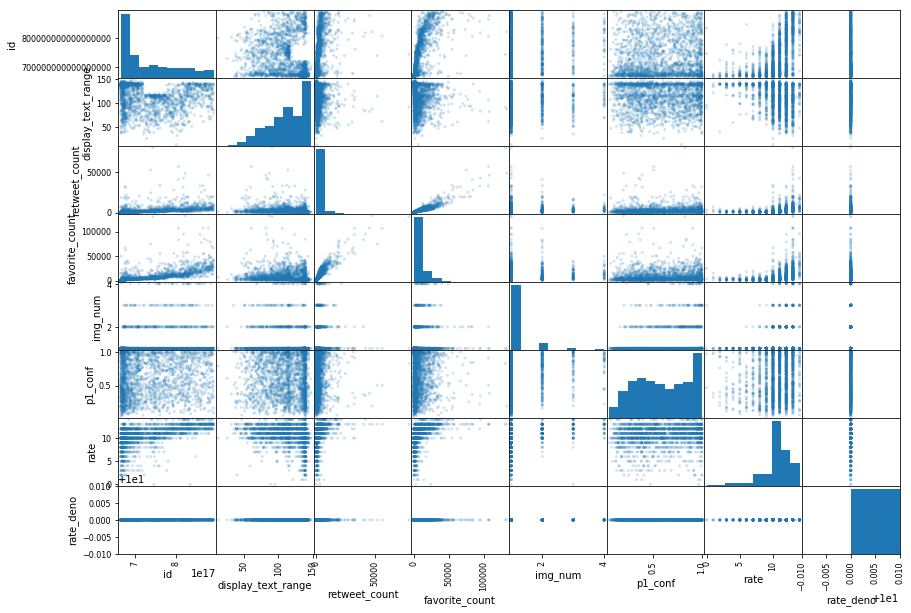

In [1950]:
from pandas.plotting import scatter_matrix
scatter_matrix(df,alpha=0.2,figsize=(14,10));

### 分析retweet_count和favorite_count的关系


##### 经过上方的scatter-matrix可以看出retweet_count和favorite_count两列存在线性关系

In [1951]:
#将retweet_count和favorite_count中等于0的行去除，以便正确计算相关系数
df_ret_fav = df[(df['retweet_count'] != 0) & (df['favorite_count'] != 0)]

Text(0.5, 1.0, 'The relationship between retweet counts and favorite counts')

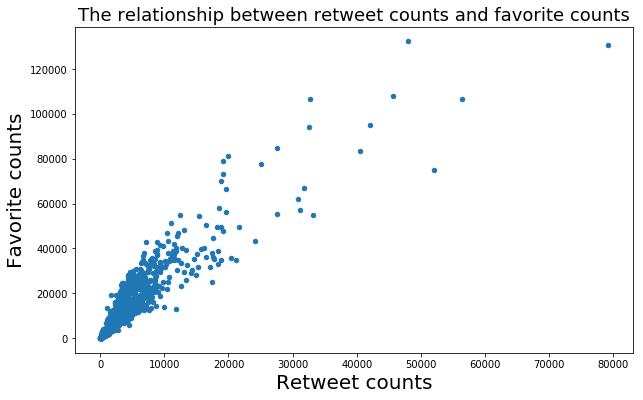

In [1952]:
#画散点图
df_ret_fav.plot.scatter('retweet_count', 'favorite_count',figsize=(10,6));

plt.xlabel('Retweet counts',fontsize =20)
plt.ylabel('Favorite counts',fontsize =20)
plt.title('The relationship between retweet counts and favorite counts',fontsize =18)

In [1953]:
#计算retweet_count和favorite_count的皮尔逊系数
df_ret_fav['retweet_count'].corr(df_ret_fav['favorite_count'])

0.9149551019798992

### 分析发送Twitter的时间与retweet_count和favorite_count的关系

In [1954]:
 #此处存在疑惑，在清理的过程中已经做过格式转换，为何保存后重新打开，还是object格式，不得已又重新转换
    
df['timestamp'] = pd.to_datetime(df["timestamp"]) 
df['timestamp'].dtype

dtype('<M8[ns]')

In [1955]:
df_time =df.copy()
df_time['hour'] = df_time['timestamp'].dt.hour

In [1956]:
df_time.sample(3)

,id,timestamp,text,actual_catg,display_text_range,retweet_count,favorite_count,img_num,p1,p1_conf,rate,rate_deno,name_1,hour
1416,678740035362037760,2015-12-21 00:53:29,Meet Tango. He's a large dog. Doesn't care much for personal space. Owner isn't very accepting. Tongue slip. 6/10 https://t.co/p2T5...,0,137,1920,4086,1,seat_belt,0.787164,6.0,10,Tango,0
308,822975315408461824,2017-01-22 01:12:59,This is Albus. He's soaked as h*ck. Seems to have misplaced an ear as well. Still in good spirits tho. 12/10 would dry https://t.co...,0,118,3936,19071,1,bathtub,0.331098,12.0,10,Albus,1
1191,691459709405118465,2016-01-25 03:16:56,Say hello to Leo. He's a Fallopian Puffalope. Precious af. 12/10 would cuddle https://t.co/LZEi0DpRsH,0,101,1290,4437,1,shetland_sheepdog,0.551206,12.0,10,Leo,3


Text(0.5, 1.0, 'Which hours in a day have the most favorite counts?')

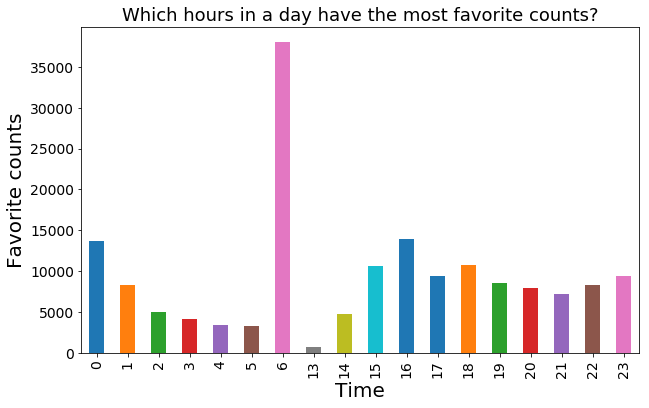

In [1957]:
df_time.groupby('hour')['favorite_count'].mean().plot.bar(fontsize=14,figsize=(10,6))

plt.xlabel('Time',fontsize =20)
plt.ylabel('Favorite counts',fontsize =20)
plt.title('Which hours in a day have the most favorite counts?',fontsize =18)

### 分析狗狗类型的评分情况

In [1958]:
df_catg = df[df['actual_catg'] !='0']

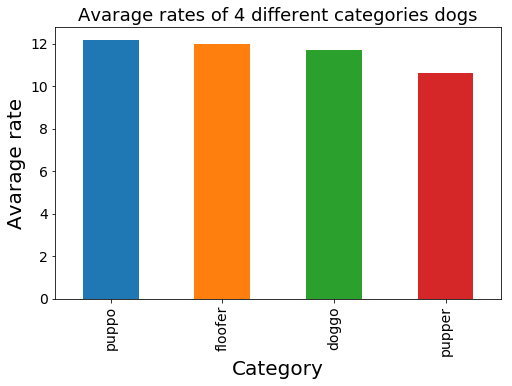

In [1959]:
df_catg.groupby('actual_catg')['rate'].mean().sort_values(ascending=False).plot.bar(fontsize=14,figsize=(8,5))

plt.xlabel('Category',fontsize =20)
plt.ylabel('Avarage rate',fontsize =20)
plt.title('Avarage rates of 4 different categories dogs',fontsize =18);

### 分析狗狗品种的偏好及评分情况

##### 定义：出现次数越多的品种，越受欢迎

In [1960]:
#去除品种为0的行
df_p = df[df['p1'] != 0]

golden_retriever      138
labrador_retriever     95
pembroke               88
chihuahua              79
pug                    54
chow                   41
samoyed                40
pomeranian             38
toy_poodle             38
malamute               29
Name: p1, dtype: int64


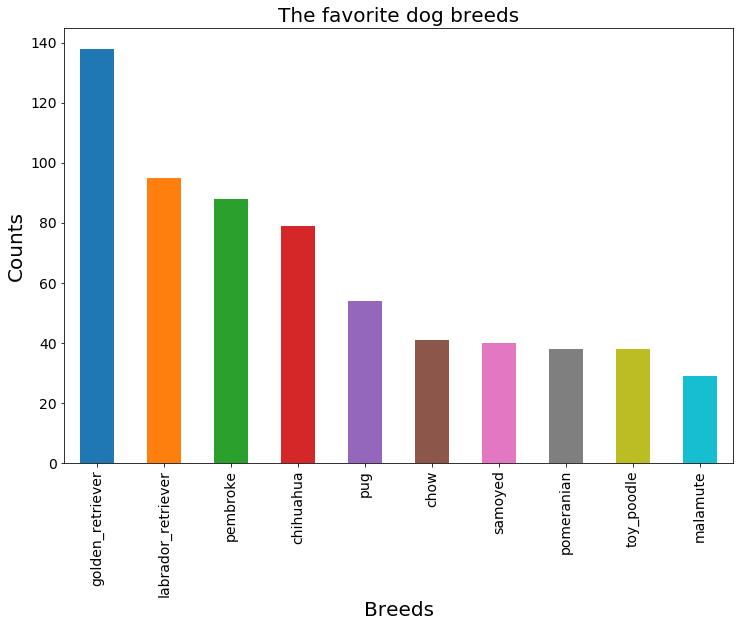

In [1961]:
#又高到低，排序“最受欢迎的”10个狗狗品种
top10_p1 = df_p.p1.value_counts()[:10]
print(top10_p1)

plt.xlabel('Breeds',fontsize =20)
plt.ylabel('Counts',fontsize =20)
plt.title('The favorite dog breeds',fontsize =20)
top10_p1.plot.bar(fontsize=14,figsize=(12,8));

In [1962]:
#“最受欢迎的”10个狗狗品种
top10_p1.index

Index(['golden_retriever', 'labrador_retriever', 'pembroke', 'chihuahua',
       'pug', 'chow', 'samoyed', 'pomeranian', 'toy_poodle', 'malamute'],
      dtype='object')

p1
samoyed             11.700000
golden_retriever    11.634058
chow                11.609756
pembroke            11.443182
cocker_spaniel      11.296296
pomeranian          11.151316
toy_poodle          11.105263
chihuahua           10.708861
pug                 10.240741
Name: rate, dtype: float64


Text(0.5, 1.0, 'The average rate of top 10 favorite dog breeds')

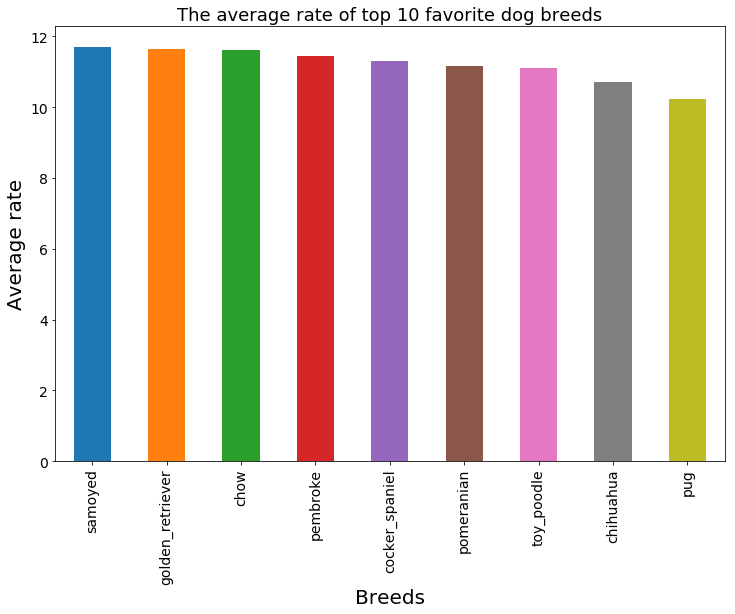

In [1963]:
#最受欢迎的10个品种的狗狗的评分排名
df_top10_p1 =df_p.query('p1 =="golden_retriever"| p1== "labrador_retriever "|  p1== "pembroke" | p1 =="chihuahua"| p1== "pug"|  p1== "samoyed" | p1 =="chow"| p1== "toy_poodle"|  p1== "pomeranian" | p1== "cocker_spaniel"')
top10_rate = df_top10_p1.groupby('p1').rate.mean().sort_values(ascending=False)
print(top10_rate)

top10_rate.plot.bar(fontsize=14,figsize=(12,8));
plt.xlabel('Breeds',fontsize =20)
plt.ylabel('Average rate',fontsize =20)
plt.title('The average rate of top 10 favorite dog breeds',fontsize =18)

### 分析最受欢迎的狗狗名字

In [1966]:
df_name = df[df['name_1'] !='0']

Charlie    11
Cooper     10
Tucker      9
Oliver      9
Lucy        9
Winston     8
Penny       8
Toby        7
Daisy       7
Lola        7
Stanley     6
Bella       6
Sadie       6
Koda        6
Buddy       5
Scout       5
Rusty       5
Jax         5
Leo         5
Bailey      5
Name: name_1, dtype: int64


Text(0.5, 1.0, 'What are the favorite names?')

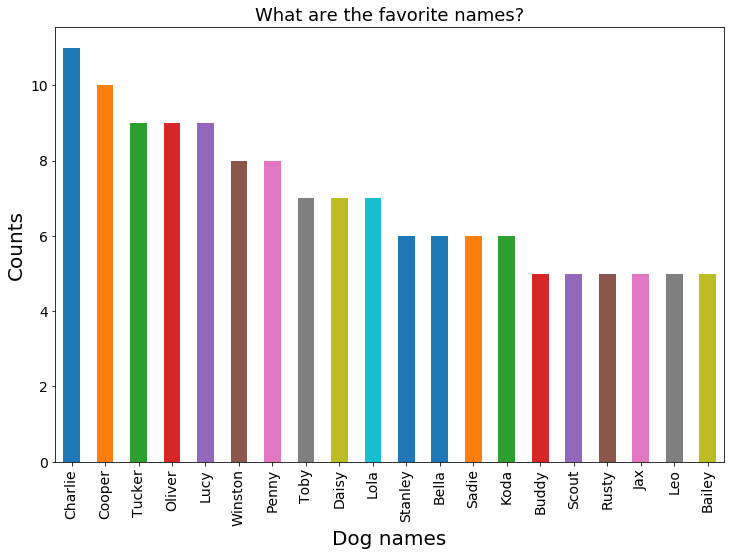

In [1967]:
top10_names = df_name['name_1'].value_counts()[:20]
print(top10_names)

top10_names.plot.bar(figsize=(12,8),fontsize=14)
plt.xlabel('Dog names',fontsize =20)
plt.ylabel('Counts',fontsize =20)
plt.title('What are the favorite names?',fontsize =18)

## 说明

- 本项目主要任务在于数据的清理和可视化。
- 本文件包含项目清洗和可视化过程的处理细节，并未包含结论和项目总结（此部分内容请见文件`act_report.pdf`）